In [425]:
import pandas as pd
import numpy as np                    
import seaborn as sns                  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sn                   
import warnings                       
warnings.filterwarnings("ignore")

In [426]:
encoding = ['utf-8','latin1','ISO-8859-1','CP1252']
file_path =('spam.csv')
for encoding in encoding:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"file successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
             print(f"file failed to read with encoding: {encoding}")
             continue

if 'df' in locals():
    print("csv loaded successfully")
else:
    print("all attempts failed. unable to read")

file failed to read with encoding: utf-8
file successfully read with encoding: latin1
csv loaded successfully


In [427]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3356,ham,"Brainless Baby Doll..:-D;-), vehicle sariyag d...",NaN,NaN,NaN
5536,ham,Aiyah ok wat as long as got improve can alread...,NaN,NaN,NaN
1489,ham,Ok i juz receive..,NaN,NaN,NaN
813,ham,I borrow ur bag ok.,NaN,NaN,NaN
3119,ham,Good evening! this is roger. How are you?,NaN,NaN,NaN


In [428]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [430]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [431]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [432]:
df.sample(5)

,target,text
4675,ham,ÌÏ ready then call me...
3408,ham,Whats that coming over the hill..... Is it a m...
4813,ham,Ummmmmaah Many many happy returns of d day my ...
4323,ham,I am not having her number sir
939,ham,Better. Made up for Friday and stuffed myself ...


In [433]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [434]:
df['target'] = encoder.fit_transform(df['target'])

In [435]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [436]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [437]:
df.duplicated().sum()

403

In [438]:
df = df.drop_duplicates(keep = 'first')

In [439]:
df.duplicated().sum()

0

In [440]:
df.shape

(5169, 2)

# 2. EDA

In [441]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [442]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

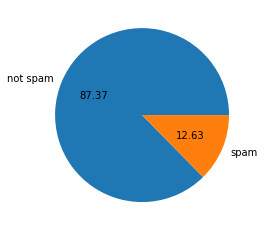

In [443]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['not spam', 'spam'], autopct="%0.2f")
plt.show()

In [444]:
import nltk

In [445]:
!pip install nltk

In [446]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [447]:
df['num_characters']=df['text'].apply(len)

In [448]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [449]:
df['words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [450]:
df.head()

,target,text,num_characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [451]:
df['sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [452]:
df.head()

,target,text,num_characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [453]:
df[['num_characters','words','sentences']].describe()

,num_characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [454]:
df[df['target']==0][['num_characters','words','sentences']].describe()

,num_characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [455]:
df[df['target']==1][['num_characters','words','sentences']].describe()

,num_characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [456]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

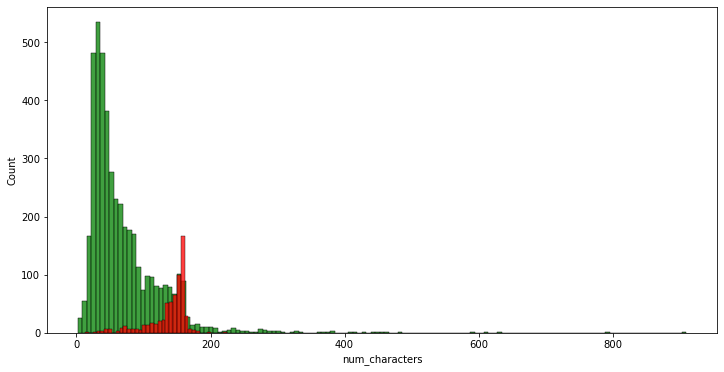

In [457]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'], color = 'green')
sns.histplot(df[df['target']==1]['num_characters'], color = 'red')

<AxesSubplot:xlabel='words', ylabel='Count'>

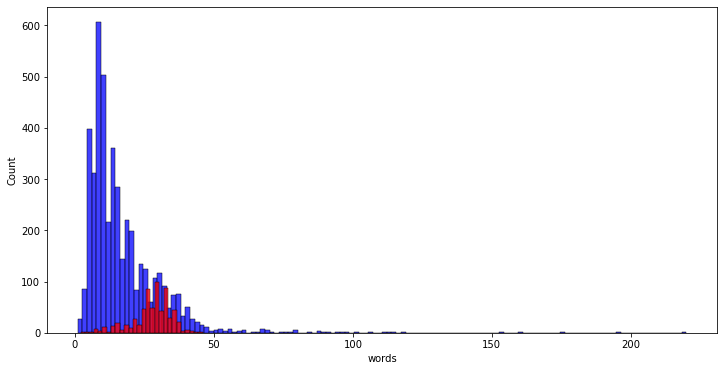

In [458]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['words'], color = 'blue')
sns.histplot(df[df['target']==1]['words'], color = 'red')

<AxesSubplot:xlabel='sentences', ylabel='Count'>

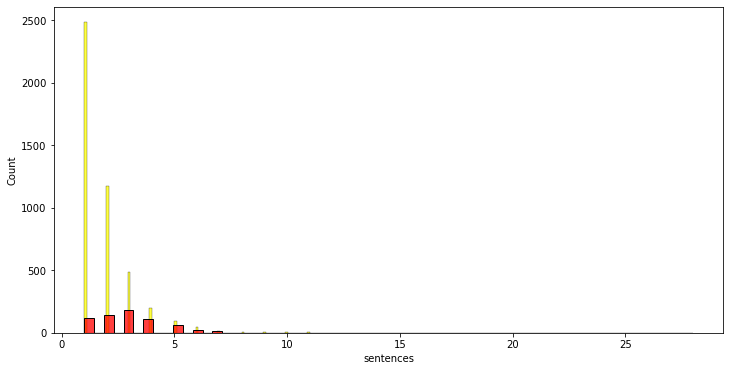

In [459]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['sentences'], color = 'yellow')
sns.histplot(df[df['target']==1]['sentences'], color = 'red')

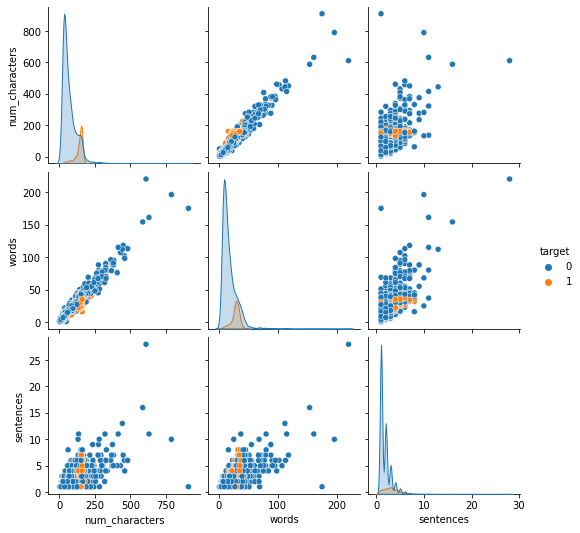

In [460]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

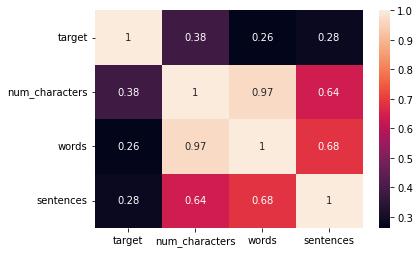

In [461]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing

In [462]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [463]:
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
         y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough tonight")
print(transformed_text)
   

gon na home soon want talk stuff anymor tonight k cri enough tonight


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [464]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [465]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [466]:
df['transformed_text'] = df['text'].apply(transform_text)

In [467]:
df.head()

,target,text,num_characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [468]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [469]:
len(spam_corpus)

9939

In [470]:
not_spam_corpus = []
for msg in df[df['target']== 0 ]['transformed_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [471]:
len(not_spam_corpus)

35394

In [472]:
df.head()

,target,text,num_characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Building the Model

In [473]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [474]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [475]:
x.shape

(5169, 3000)

In [476]:
y = df['target'].values

In [477]:
from sklearn.model_selection import train_test_split

In [478]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [479]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [480]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [481]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [482]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [483]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [484]:
!pip install xgboost

In [485]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from  xgboost import XGBClassifier

In [486]:
svc = SVC(kernel = 'sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [487]:
clfs = {
    
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [488]:
def train_classifier(clf, x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [489]:
train_classifier(svc, x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [490]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print('For ', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ', current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


In [491]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision')

In [492]:
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.929400,0.828283
7,BgC,0.957447,0.867188
9,GBDT,0.947776,0.920000
10,xgb,0.966151,0.925620
6,AdaBoost,0.960348,0.929204
4,LR,0.958414,0.970297
8,ETC,0.974855,0.974576
0,SVC,0.975822,0.974790
5,RF,0.974855,0.982759
1,KN,0.905222,1.000000


In [493]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

In [494]:
performance_df1

,Algorithm,variable,value
0,DT,Accuracy,0.929400
1,BgC,Accuracy,0.957447
2,GBDT,Accuracy,0.947776
3,xgb,Accuracy,0.966151
4,AdaBoost,Accuracy,0.960348
5,LR,Accuracy,0.958414
6,ETC,Accuracy,0.974855
7,SVC,Accuracy,0.975822
8,RF,Accuracy,0.974855
9,KN,Accuracy,0.905222


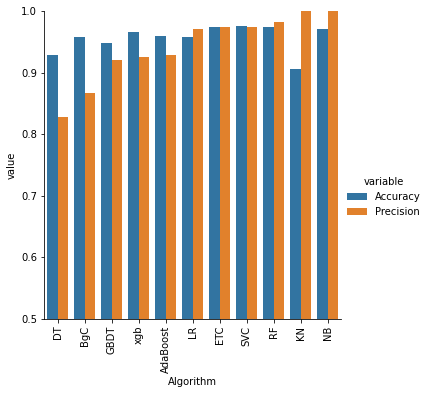

In [495]:
sns.catplot(x = 'Algorithm',y='value',
           hue = 'variable',data = performance_df1,kind='bar',height=5
           )

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [496]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)

In [497]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [498]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [499]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_num_chars': accuracy_scores, 'Precision_num_chars': precision_scores}).sort_values('Precision_num_chars', ascending=False)

In [500]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283
1,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188
2,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
3,xgb,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620
4,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
7,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
8,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
9,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000


In [501]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [502]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb',mnb),('et',etc)],voting='soft')

In [503]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [504]:
y_pred = voting.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [505]:
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [506]:
from sklearn.ensemble import StackingClassifier

In [507]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [508]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [510]:
import pickle
pickle.dump(tfidf,open('vectorizer.pk','wb'))
pickle.dump(mnb,open('model.pk','wb'))

In [511]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

x_train = ['Sample text 1', 'Sample text 2','Sample text 3']
y_train = [0,1,0]

tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
x_train_tfidf = tfidf.fit_transform(x_train)

mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)

with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)